In [1]:
from data_fonctions import *
import MITgcmutils
import pandas as pd

# Open and read the binary files from the ECCO-Darwin LLC_270 model outputs

## 0) a. Open and display a DIC data to analyze the original and flattened grid structure

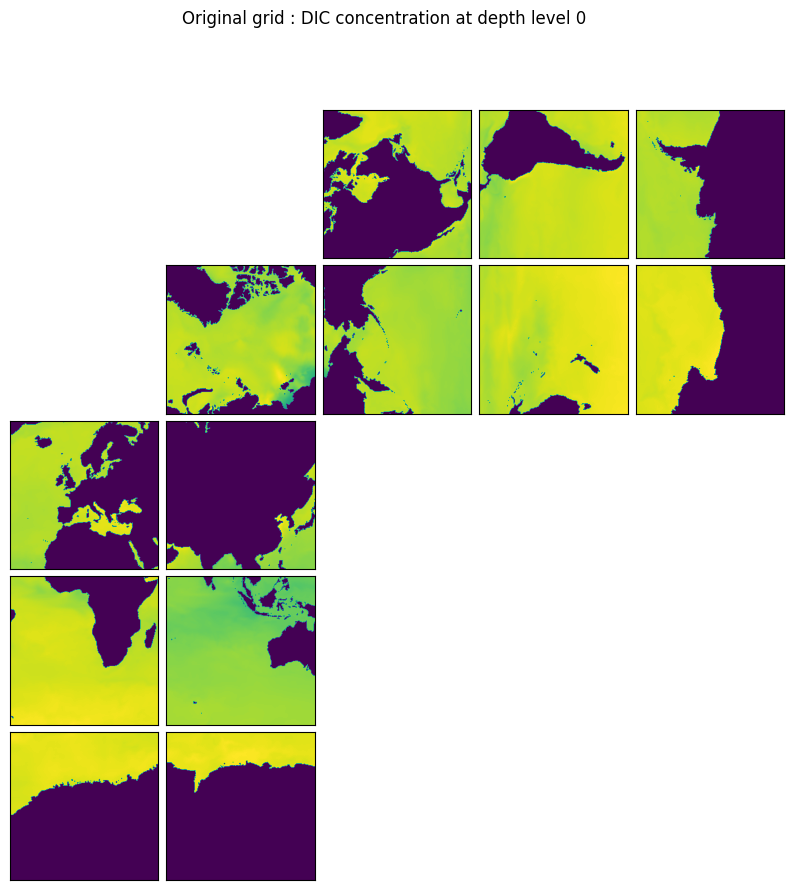

In [7]:
# Define the binary data file to be read
fname = "DIC.0000002232.data"

# Define the grid dimensions
nx = 270  # Number of grid points in the x-direction (longitude)
ny = 13 * nx  # Number of grid points in the y-direction (latitude)
nz = 50  # Number of vertical levels (depth layers)

# Read the binary file using MITgcmutils
# The data is expected to be in a (depth, latitude, longitude) format
data = MITgcmutils.utils.readbin(fname, (nz, ny, nx), dataprec="float32", machineformat="b")

# Plot the first depth level
plot_tiles(data[0, :, :], 270, title="Original grid : DIC concentration at depth level 0")

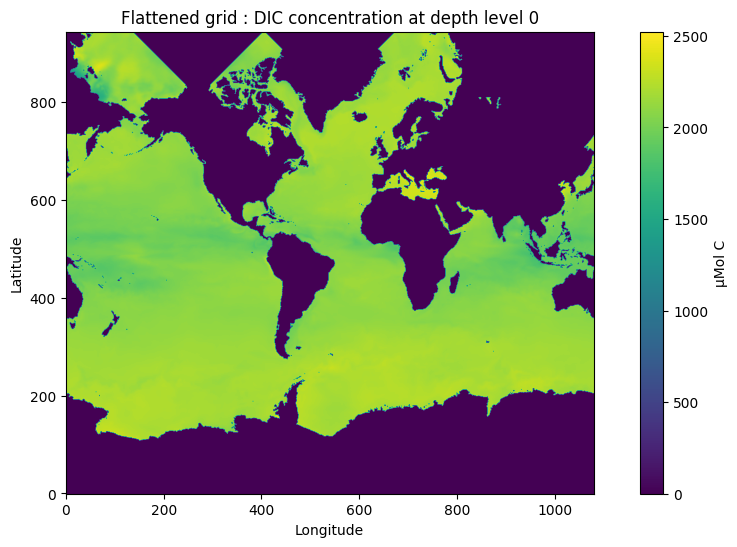

In [4]:
# Convert the 3D data array into a flattened 2D global projection
# This process is done for each depth level individually
flat_data = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Plot the first depth level after flattening
simple_plot_flat_data(flat_data[0, :, :], title="Flattened grid : DIC concentration at depth level 0", unit="µMol C")

In [18]:
# Show the shape of the original and flattened data arrays
print(f"Original shape: {data.shape}, Flattened shape: {flat_data.shape}")

Original shape: (50, 3510, 270), Flattened shape: (50, 945, 1080)


## 0) b. Open the binary X and Y grid files and display the different grid points

In [2]:
# Define grid dimensions of X and Y grids
nx = 270  # Number of grid points in the x-direction (longitude)
ny = 13 * nx  # Number of grid points in the y-direction (latitude)
nz = 1  # Number of vertical layers (depth layers) : assuming a single vertical layer

### Open and display the coordinates of scalars C and velocities U and V on an Arakawa C grid

In [3]:
# Read and flatten binary data (XC)
XC = MITgcmutils.utils.readbin("XC.data", (nz, ny, nx), dataprec="float32", machineformat="b")
flat_XC = np.array([flat(XC[depth, :, :]) for depth in range(nz)], dtype=np.float32)

flat_XC[0, :, :]

array([[66.098404, 66.12868 , 66.16058 , ..., 66.0162  , 66.04227 ,
        66.06964 ],
       [68.30269 , 68.39353 , 68.48924 , ..., 68.05593 , 68.13421 ,
        68.21636 ],
       [70.5112  , 70.66216 , 70.82117 , ..., 70.10088 , 70.23108 ,
        70.36769 ],
       ...,
       [98.05598 , 98.062225, 98.06871 , ...,  0.      ,  0.      ,
         0.      ],
       [97.63361 , 97.63737 , 97.64126 , ...,  0.      ,  0.      ,
         0.      ],
       [97.21121 , 97.21246 , 97.21376 , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [4]:
# Read and flatten binary data (YC)
YC = MITgcmutils.utils.readbin("YC.data", (nz, ny, nx), dataprec="float32", machineformat="b")
flat_YC = np.array([flat(YC[depth, :, :]) for depth in range(nz)])

flat_YC[0, :, :]

array([[-88.19870758, -88.24542236, -88.29214478, ..., -88.05858612,
        -88.10529327, -88.1519928 ],
       [-88.19594574, -88.24259186, -88.28923035, ..., -88.05603027,
        -88.10266876, -88.14930725],
       [-88.19039154, -88.23688507, -88.28337097, ..., -88.0508728 ,
        -88.09738159, -88.14389038],
       ...,
       [ 72.10919189,  72.25028992,  72.39357758, ...,   0.        ,
          0.        ,   0.        ],
       [ 72.1105957 ,  72.25170135,  72.3950119 , ...,   0.        ,
          0.        ,   0.        ],
       [ 72.11128998,  72.25241089,  72.39572906, ...,   0.        ,
          0.        ,   0.        ]])

In [5]:
# Read and flatten binary data (XG)
XG = MITgcmutils.utils.readbin("XG.data", (nz, ny, nx), dataprec="float32", machineformat="b")
flat_XG = np.array([flat(XG[depth, :, :]) for depth in range(nz)])

flat_XG[0, :, :]

array([[67.17044067, 67.22947693, 67.29164886, ..., 65.        ,
        65.        , 65.        ],
       [69.34864044, 69.46657562, 69.59073639, ..., 67.00988007,
        67.06083679, 67.11429596],
       [71.52787018, 71.70402527, 71.88939667, ..., 69.027771  ,
        69.12963867, 69.23646545],
       ...,
       [97.84243011, 97.84727478, 97.85237885, ...,  0.        ,
         0.        ,  0.        ],
       [97.42123413, 97.42365265, 97.42620087, ...,  0.        ,
         0.        ,  0.        ],
       [97.        , 97.        , 97.        , ...,  0.        ,
         0.        ,  0.        ]])

In [6]:
# Read and flatten binary data (YG)
YG = MITgcmutils.utils.readbin("YG.data", (nz, ny, nx), dataprec="float32", machineformat="b")
flat_YG = np.array([flat(YG[depth, :, :]) for depth in range(nz)])

flat_YG[0, :, :]

array([[-88.17433167, -88.22101593, -88.26770782, ..., -88.03555298,
        -88.08226013, -88.12897491],
       [-88.17023468, -88.21681213, -88.26338959, ..., -88.03429413,
        -88.08097076, -88.1276474 ],
       [-88.16335297, -88.20974731, -88.25613403, ..., -88.03048706,
        -88.07706451, -88.1236496 ],
       ...,
       [ 72.04204559,  72.18012238,  72.32255554, ...,   0.        ,
          0.        ,   0.        ],
       [ 72.04308319,  72.18117523,  72.32362366, ...,   0.        ,
          0.        ,   0.        ],
       [ 72.04343414,  72.18152618,  72.32397461, ...,   0.        ,
          0.        ,   0.        ]])

In [10]:
# Show the shape of the original and flattened grids
print(f"Original shape: {XC.shape}, Flattened shape: {flat_XC.shape}")

Original shape: (1, 3510, 270), Flattened shape: (1, 945, 1080)


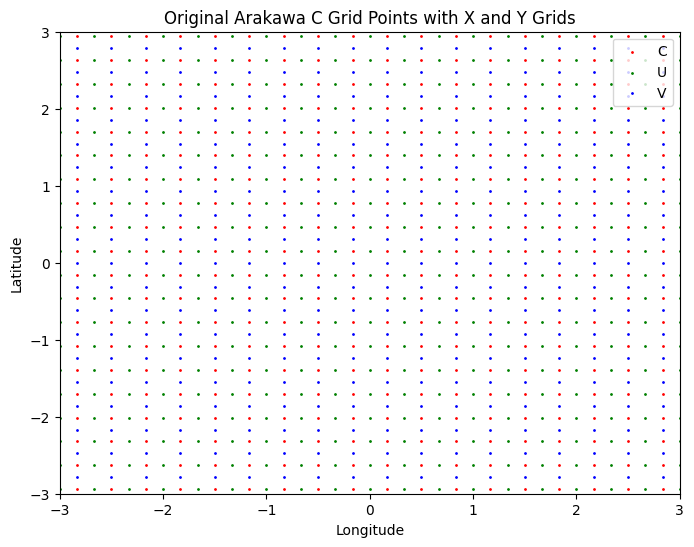

In [39]:
%matplotlib inline
# Plot the grid points for scalar C, U-velocity, and V-velocity
plt.figure(figsize=(8, 6))
plt.scatter(XC, YC, color="red", label="C", s=1)  # C points 
plt.scatter(XG, YC, color="green", label="U", s=1)  # U velocity points 
plt.scatter(XC, YG, color="blue", label="V", s=1)  # V velocity points 

# Set the x and y axis limits to range from -3 to 3
plt.xlim(-3, 3) 
plt.ylim(-3, 3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.title("Original Arakawa C Grid Points with X and Y Grids")
plt.show()

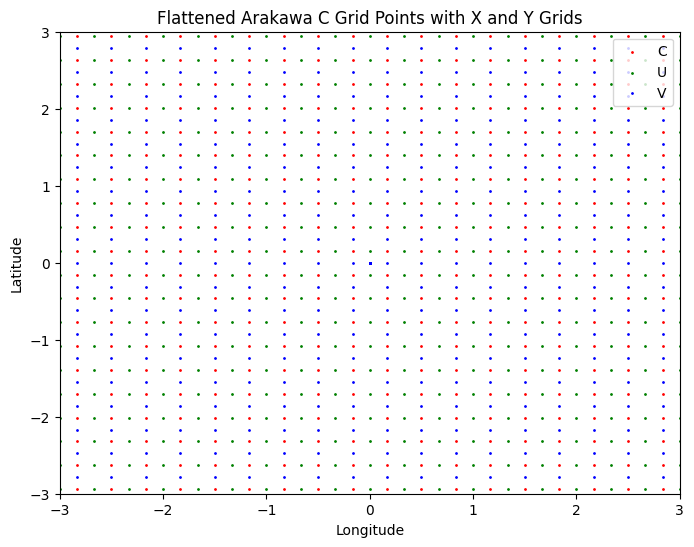

In [13]:
# Plot the flattened grid points for scalar C, U-velocity, and V-velocity
# These points are projected to a flat coordinate system
plt.figure(figsize=(8, 6))
plt.scatter(flat_XC, flat_YC, color="red", label="C", s=1)  # Flattened C points
plt.scatter(flat_XG, flat_YC, color="green", label="U", s=1)  # Flattened U velocity points
plt.scatter(flat_XC, flat_YG, color="blue", label="V", s=1)  # Flattened V velocity points

# Set the x and y axis limits to range from -3 to 3
plt.xlim(-3, 3) 
plt.ylim(-3, 3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.title("Flattened Arakawa C Grid Points with X and Y Grids")
plt.show()

In [11]:
# X and Y grid points can't be transformed into single longitude and latitude vectors because of the irregular grid structure 
# The grid points are not equally spaced in the X and Y directions.
# Keep the 2D irregular grids (XC, YC, XG, YG)

# Check the size cells in X and Y grids
print("Size of flattened XC cells in first column:", flat_XC[0, 1, :50] - flat_XC[0, 0, :50])
print("Size of flattened YC cells in first row:", flat_YC[0, :50, 1] - flat_YC[0, :50, 0])

Size of flattened XC cells in first column: [  2.2042847   2.2648544   2.328659    2.3959885   2.4671478   2.5424652
   2.622322    2.7071457   2.797432    2.8937302   2.996643    3.1069183
   3.2253418   3.3528748   3.490631    3.6398697   3.8021088   3.9791183
   4.173012    4.3863373   4.622154    4.884201    5.177086    5.506569
   5.879898    6.306343    6.797943    7.370575    8.0456085   8.852364
   9.832024   11.043861   12.575272   14.557617   17.188087   20.737862
  25.392632   29.834274   21.186256  338.81372   -29.834274  -25.39264
 -20.737862  -17.188087  -14.557625  -12.575272  -11.043861   -9.832024
  -8.852371   -8.0456085]
Size of flattened YC cells in first row: [-0.04671478 -0.04664612 -0.04649353 -0.04627228 -0.04598236 -0.04561615
 -0.04519653 -0.04470825 -0.04416656 -0.0435791  -0.04293823 -0.04225922
 -0.04154968 -0.04081726 -0.04006195 -0.03929138 -0.03849792 -0.03771973
 -0.03691864 -0.03612518 -0.03533936 -0.03455353 -0.03378296 -0.03302002
 -0.03227997 -0.031

In [12]:
# Zeros are added when flattening the data because of the using of tiles to create the global projection data
# Real data size (3510, 270) = 947 000 & flattened data size (945, 1080) = 1 020 600 ~> 73 600 zeros added

# Check the number of zeros in the original and flattened X and Y grids
print("Number of zeros in XC:", np.sum(abs(XC) == 0))  
print("Number of zeros after flattening:", np.sum(abs(flat_XC) == 0))  

Number of zeros in XC: 0
Number of zeros after flattening: 72630


### Interpolate missing flattened X and Y coordinates to obtain an irregular but complete grid approximation (without added zeros)

In [8]:
# Define the flattened grids to interpolate
grids = {"flat_XC": flat_XC, "flat_YC": flat_YC, "flat_XG": flat_XG, "flat_YG": flat_YG}
new_grids = {}

# Loop through each grid and interpolate missing values (run once to save numpy files --> take a long time)
for name, grid in tqdm(grids.items(), desc="Interpolating grids"):
    interpolate_missing_values(grid, name)

Interpolating grids: 100%|██████████| 4/4 [00:00<00:00, 3988.88it/s]

File flat_XC_inter.npy already exists.
File flat_YC_inter.npy already exists.
File flat_XG_inter.npy already exists.
File flat_YG_inter.npy already exists.


## 1) Load and display the interpolated flattened X and Y grids

In [2]:
# Extract the interpolated grids        
flat_XC_inter = np.load("flat_XC_inter.npy")
flat_YC_inter = np.load("flat_YC_inter.npy")
flat_XG_inter = np.load("flat_XG_inter.npy")
flat_YG_inter = np.load("flat_YG_inter.npy")

flat_XC_inter[0, :, :]

array([[ 66.098404,  66.12868 ,  66.16058 , ...,  66.0162  ,  66.04227 ,
         66.06964 ],
       [ 68.30269 ,  68.39353 ,  68.48924 , ...,  68.05593 ,  68.13421 ,
         68.21636 ],
       [ 70.5112  ,  70.66216 ,  70.82117 , ...,  70.10088 ,  70.23108 ,
         70.36769 ],
       ...,
       [ 98.05597 ,  98.062225,  98.068726, ..., 141.76471 , 141.87311 ,
        141.96295 ],
       [ 97.633606,  97.63736 ,  97.641266, ..., 141.76471 , 141.87311 ,
        141.96295 ],
       [ 97.21121 ,  97.21246 ,  97.213745, ..., 141.76471 , 141.87311 ,
        141.96295 ]], dtype=float32)

C:\Users\ocean\PycharmProjects\Master MIX\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


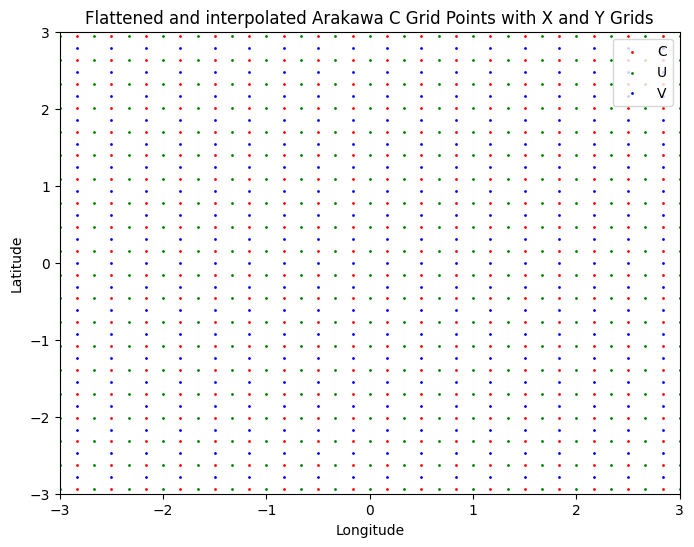

In [4]:
# Plot the flattened grid points for scalar C, U-velocity, and V-velocity where the missing coordinate points are replaced by interpolation
# These interpolate points are projected to a flat coordinate system
plt.figure(figsize=(8, 6))
plt.scatter(flat_XC_inter, flat_YC_inter, color="red", label="C", s=1)  # Flattened and interpolated C points
plt.scatter(flat_XG_inter, flat_YC_inter, color="green", label="U", s=1)  # Flattened and interpolated U velocity points
plt.scatter(flat_XC_inter, flat_YG_inter, color="blue", label="V", s=1)  # Flattened and interpolated V velocity points

# Set the x and y axis limits to range from -3 to 3
plt.xlim(-3, 3) 
plt.ylim(-3, 3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.title("Flattened and interpolated Arakawa C Grid Points with X and Y Grids")
plt.show()

## 2) Create NetCDF files from binary DIC, Alk, U and V data for longitudes/latitudes defined by 2D Arakawa-C X and Y grids

In [3]:
# Define the files to save
file = "0000081144"

# Define the time period and start date for the data
dtime = "1995-01"
day = "03"
time_start = np.array([pd.to_datetime(f"{dtime}-{day}").value])
date_start = pd.to_datetime(f"{dtime}-{day}").strftime("%Y-%m-%d")

# Define the depth levels at the center of each layer for DIC, ALK, SALT, SST scalars, and U and V velocities
Z = np.array([5.000000e+00, 1.500000e+01, 2.500000e+01, 3.500000e+01, 4.500000e+01,
             5.500000e+01, 6.500000e+01, 7.500500e+01, 8.502500e+01, 9.509500e+01,
             1.053100e+02, 1.158700e+02, 1.271500e+02, 1.397400e+02, 1.544700e+02,
             1.724000e+02, 1.947350e+02, 2.227100e+02, 2.574700e+02, 2.999300e+02,
             3.506800e+02, 4.099300e+02, 4.774700e+02, 5.527100e+02, 6.347350e+02,
             7.224000e+02, 8.144700e+02, 9.097400e+02, 1.007155e+03, 1.105905e+03,
             1.205535e+03, 1.306205e+03, 1.409150e+03, 1.517095e+03, 1.634175e+03,
             1.765135e+03, 1.914150e+03, 2.084035e+03, 2.276225e+03, 2.491250e+03,
             2.729250e+03, 2.990250e+03, 3.274250e+03, 3.581250e+03, 3.911250e+03,
             4.264250e+03, 4.640250e+03, 5.039250e+03, 5.461250e+03, 5.906250e+03], dtype=np.float32)

# Define the depth levels at the top of each depth layer for W velocity
Zl = np.array([    0.  ,   -10.  ,   -20.  ,   -30.  ,   -40.  ,   -50.  ,
                 -60.  ,   -70.  ,   -80.01,   -90.04,  -100.15,  -110.47,
                -121.27,  -133.03,  -146.45,  -162.49,  -182.31,  -207.16,
                -238.26,  -276.68,  -323.18,  -378.18,  -441.68,  -513.26,
                -592.16,  -677.31,  -767.49,  -861.45,  -958.03, -1056.28,
               -1155.53, -1255.54, -1356.87, -1461.43, -1572.76, -1695.59,
               -1834.68, -1993.62, -2174.45, -2378.  , -2604.5 , -2854.  ,
               -3126.5 , -3422.  , -3740.5 , -4082.  , -4446.5 , -4834.  ,
               -5244.5 , -5678.  ], dtype=np.float32)

### Save the flattened DIC and Alk scalars at each depth level to a NetCDF file

In [6]:
# Define grid dimensions
nx = 270  # Number of grid points in the x-direction
ny = 13 * nx  # Number of grid points in the y-direction
nz = 50  # Number of vertical layers

# Read and flatten binary data (DIC)
data = MITgcmutils.utils.readbin(f"DIC.{file}.data", (nz, ny, nx), dataprec="float32", machineformat="b")
DIC = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Create a NetCDF file for DIC data
create_netcdf("DIC", dtime, DIC, time_start, Z, flat_XC_inter[0, :, :], flat_YC_inter[0, :, :],
              date=date_start, var_units="µM C", var_long_name="Dissolved Inorganic Carbon Concentration")

File DIC_1995-01.nc already exists.


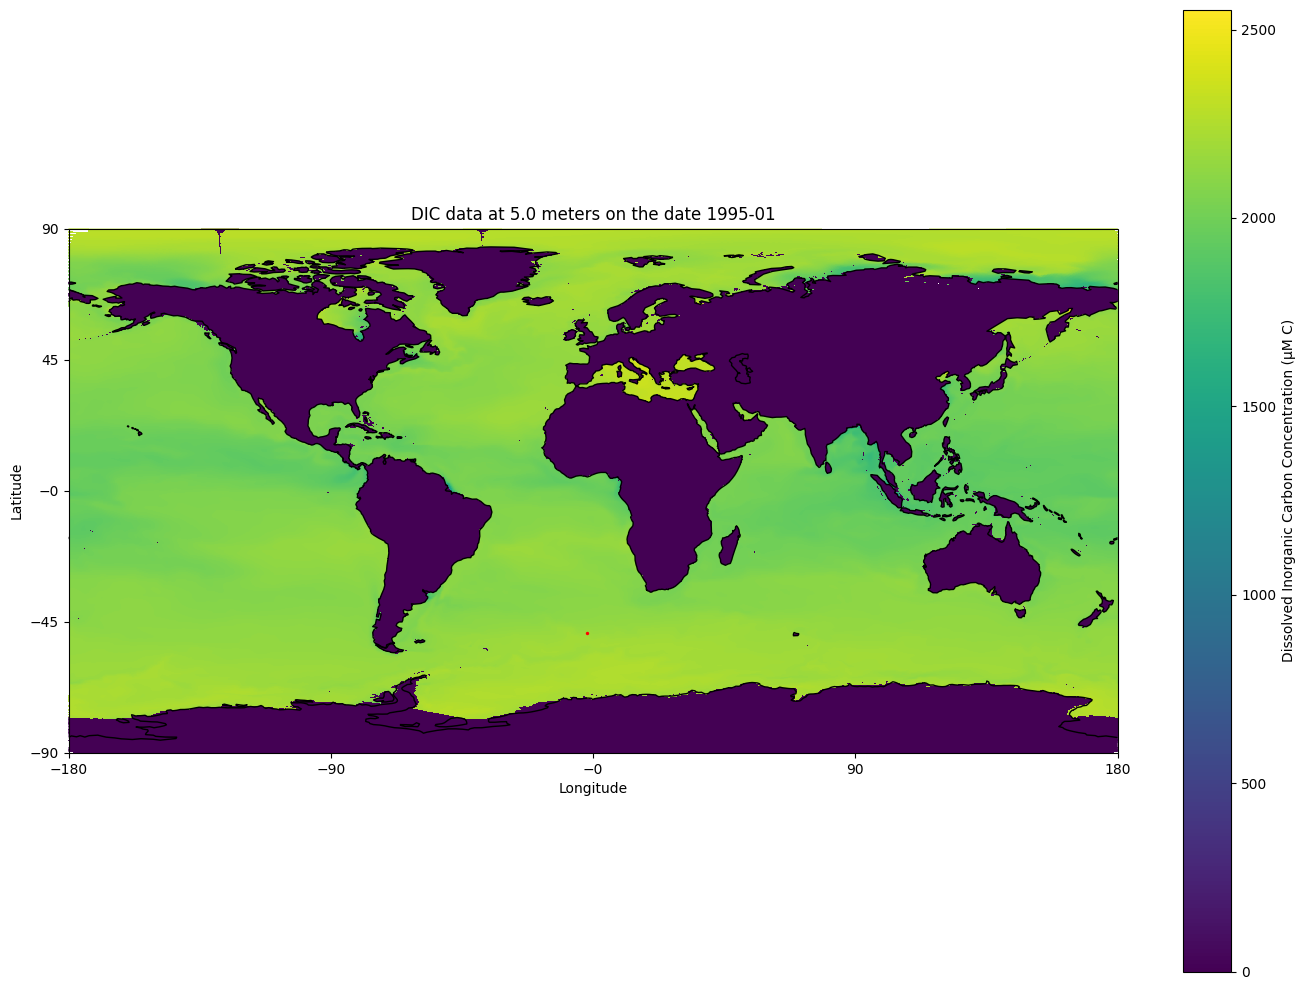

In [7]:
# Open the NetCDF file
filename = f"DIC_{dtime}.nc"
dataset = Dataset(filename, "r")

# Retrieve the data from the variables
latitudes = dataset.variables["Latitude"][:, :]  
longitudes = dataset.variables["Longitude"][:, :]  
depth = dataset.variables["Depth"][:] 
DIC = dataset.variables["DIC"][:, :]  # DIC data (with dimensions: time, depth, latitude, longitude)
title = dataset.variables["DIC"].getncattr("long_name")
unit = dataset.variables["DIC"].getncattr("units")

# Select a specific time and depth value
time_idx = 0  # First time step
depth_idx = 0  # First depth level

# Extract the data for the selected time and depth
DIC_selected = DIC[time_idx, depth_idx, :, :]

dataset.close()

# Define the scatter point (longitude, latitude)
scatter_point = (-2, -49)

# Plot the DIC data with the selected scatter point
plot_flat_data(longitudes, latitudes, DIC_selected, variable_name="DIC", colorbar_title=title, unit=unit, 
               depth_value=depth[depth_idx], time_value=dtime, scatter_point=scatter_point, cmap="viridis")

In [6]:
# Define grid dimensions
nx = 270  # Number of grid points in the x-direction
ny = 13 * nx  # Number of grid points in the y-direction
nz = 50  # Number of vertical layers

# Read and flatten binary data (ALK)
data = MITgcmutils.utils.readbin(f"ALK.{file}.data", (nz, ny, nx), dataprec="float32", machineformat="b")
ALK = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Create the NetCDF file for ALK data
create_netcdf("ALK", dtime, ALK, time_start, Z, flat_XC_inter[0, :, :], flat_YC_inter[0, :, :],
              date=date_start, var_units="µM", var_long_name="Alkalinity Concentration")

File ALK_1995-01.nc created successfully!


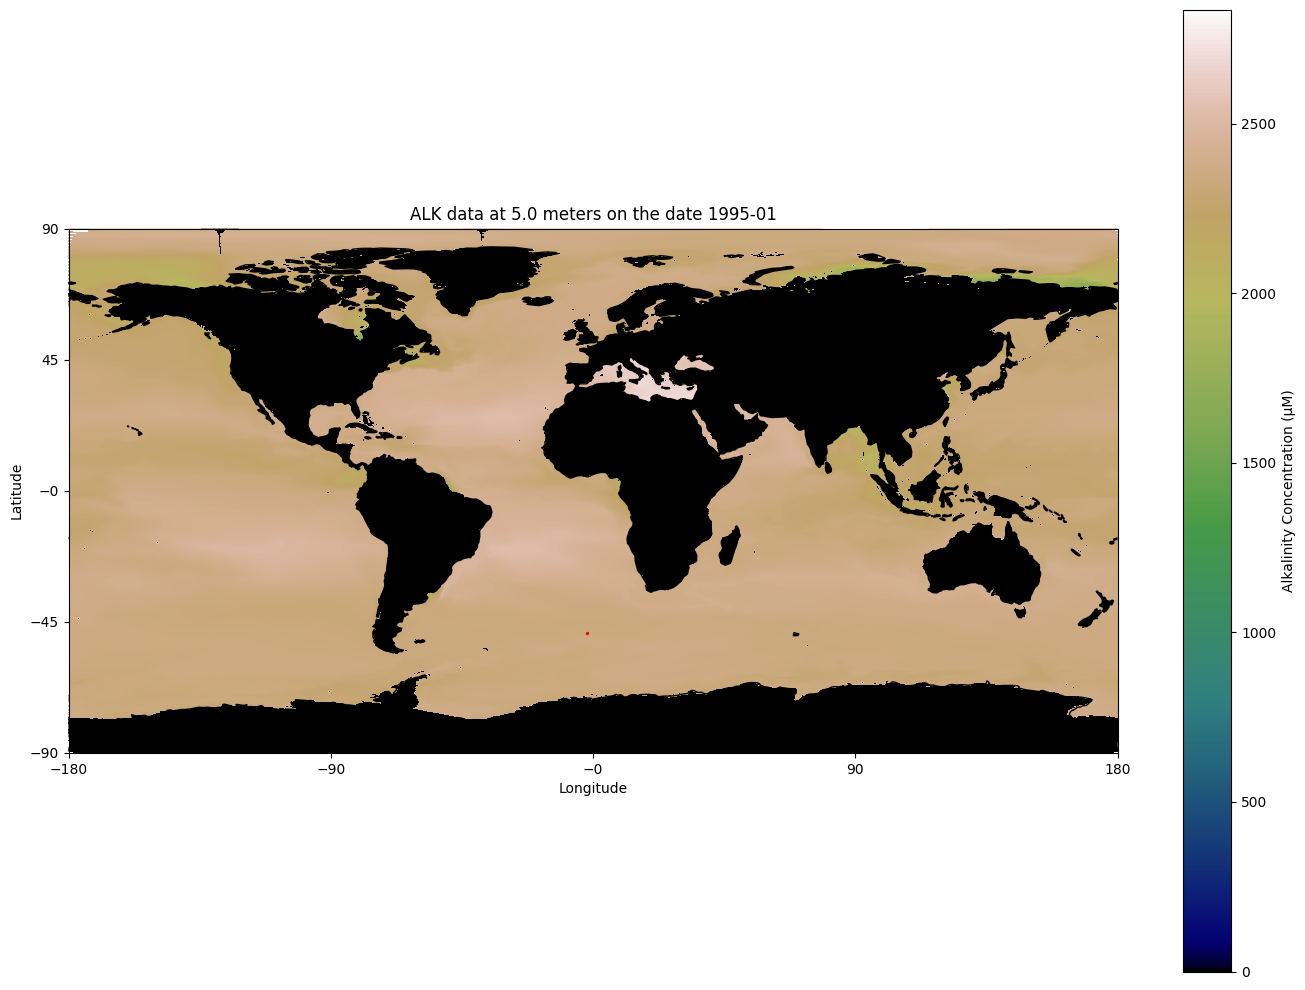

In [7]:
# Open the NetCDF file
filename = f"ALK_{dtime}.nc"
dataset = Dataset(filename, "r")

# Retrieve the data from the variables
latitudes = dataset.variables["Latitude"][:, :]
longitudes = dataset.variables["Longitude"][:, :]
depth = dataset.variables["Depth"][:]
ALK = dataset.variables["ALK"][:, :]  # ALK data (with dimensions: time, depth, latitude, longitude)
title = dataset.variables["ALK"].getncattr("long_name")
unit = dataset.variables["ALK"].getncattr("units")

# Select a specific time and depth value
time_idx = 0  # First time step
depth_idx = 0  # First depth level

# Extract the data for the selected time and depth
ALK_selected = ALK[time_idx, depth_idx, :, :]

dataset.close()

# Define the scatter point (longitude, latitude)
scatter_point = (-2, -49)

# Plot the DIC data with the selected scatter point
plot_flat_data(longitudes, latitudes, ALK_selected, variable_name="ALK", colorbar_title=title, unit=unit,
               depth_value=depth[depth_idx], time_value=dtime, scatter_point=scatter_point, 
               cmap="gist_earth")

### Save the flattened SALT and SST scalars at each depth level to a NetCDF file

In [8]:
# Define grid dimensions
nx = 270  # Number of grid points in the x-direction
ny = 13 * nx  # Number of grid points in the y-direction
nz = 50  # Number of vertical layers

# Read and flatten binary data (SALT)
data = MITgcmutils.utils.readbin(f"SALTanom.{file}.data", (nz, ny, nx), dataprec="float32", machineformat="b")
SALT = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Create a NetCDF file for SALT data
create_netcdf("SALT", dtime, SALT, time_start, Z, flat_XC_inter[0, :, :], flat_YC_inter[0, :, :],
              date=date_start, var_units="PSU", var_long_name="Practical Salinity")

File SALT_1995-01.nc created successfully!


In [9]:
# Define grid dimensions
nx = 270  # Number of grid points in the x-direction
ny = 13 * nx  # Number of grid points in the y-direction
nz = 1  # Number of vertical layers

# Read and flatten binary data (SST)
data = MITgcmutils.utils.readbin(f"SST.{file}.data", (nz, ny, nx), dataprec="float32", machineformat="b")
SST = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Create a NetCDF file for SST data
create_netcdf("SST", dtime, SST, time_start, np.array([Z[0]]), 
              flat_XC_inter[0, :, :], flat_YC_inter[0, :, :], date=date_start, var_units="°C", var_long_name="Sea Surface Temperature")

File SST_1995-01.nc created successfully!


### Save the flattened U, V and W velocities (horizontal and vertical currents)

In [4]:
# Define grid dimensions
nx = 270  # Number of grid points in the x-direction
ny = 13 * nx  # Number of grid points in the y-direction
nz = 50  # Number of vertical layers

# Read and flatten binary data (U)
data = MITgcmutils.utils.readbin(f"uVel_C.{file}.data", (nz, ny, nx), dataprec="float32", machineformat="b")
U = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Create the NetCDF file for U velocity
create_netcdf("UVEL", dtime, U, time_start, Z, flat_XG_inter[0, :, :], 
              flat_YC_inter[0, :, :], date=date_start, var_units="m/s", var_long_name="Zonal Velocity")

File UVEL_1995-01.nc created successfully!


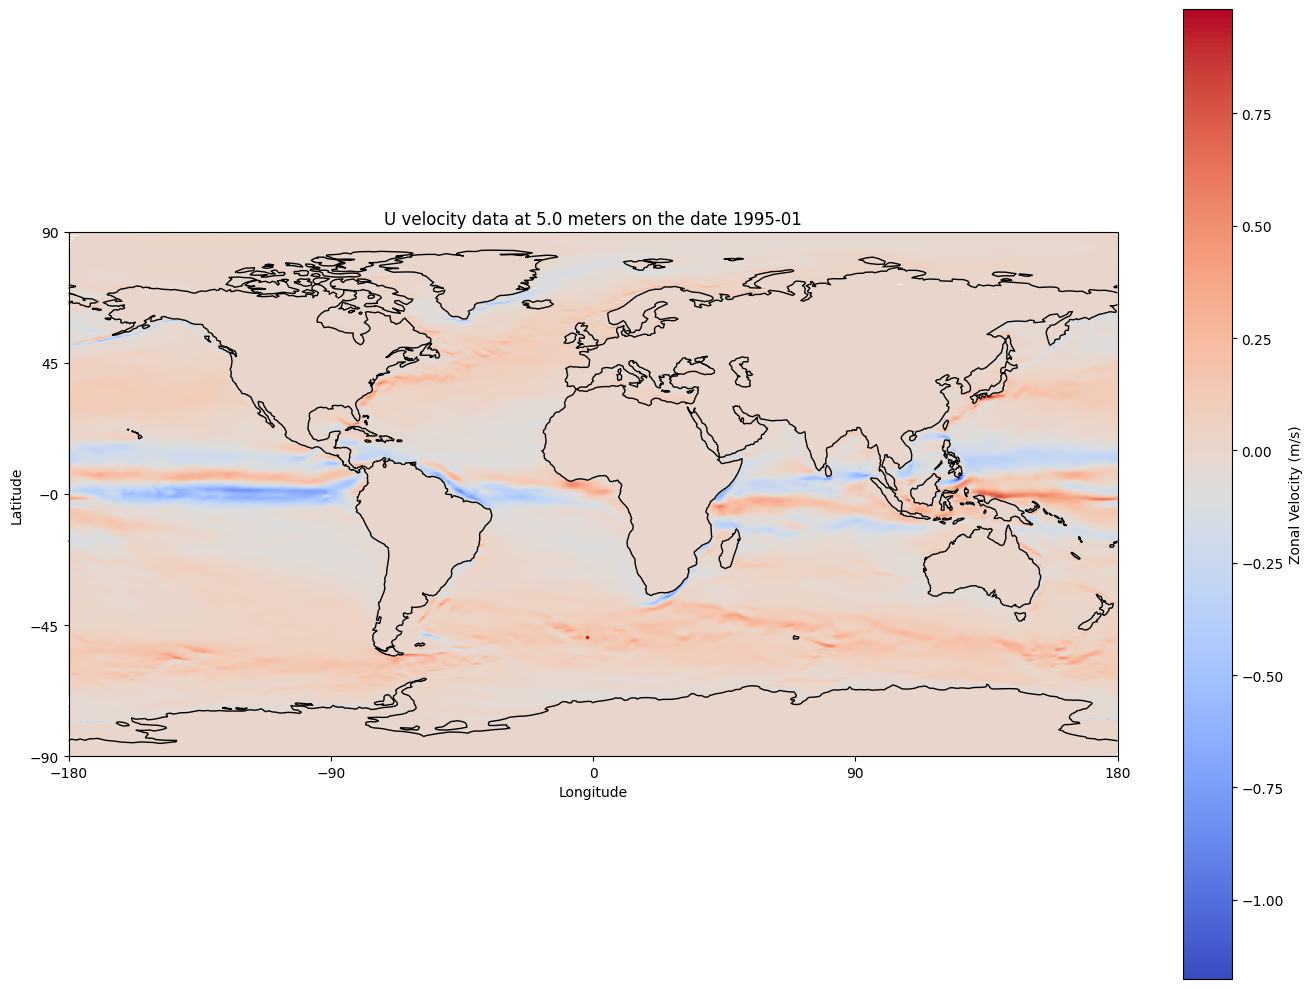

In [6]:
# Open the NetCDF file and retrieve the data
filename = f"UVEL_{dtime}.nc"
dataset = Dataset(filename, "r")

latitudes = dataset.variables["Latitude"][:]  
longitudes = dataset.variables["Longitude"][:]
depth = dataset.variables["Depth"][:] 
U = dataset.variables["UVEL"][:]  # UVEL data (with dimensions time, depth, latitude, longitude)
title = dataset.variables["UVEL"].getncattr("long_name")
unit = dataset.variables["UVEL"].getncattr("units")

# Select a specific time and depth value
time_idx = 0  # First time step
depth_idx = 0  # First depth level

# Extract the data for the selected time and depth
U_selected = U[time_idx, depth_idx, :, :]

dataset.close()

# Define the scatter point (longitude, latitude)
scatter_point = (-2, -49)

# Plot the U data with the selected scatter point
plot_flat_data(longitudes, latitudes, U_selected, variable_name="U velocity", colorbar_title=title, 
               unit=unit, depth_value=depth[depth_idx], time_value=dtime, scatter_point=scatter_point)

In [4]:
# Define grid dimensions
nx = 270  # Number of grid points in the x-direction
ny = 13 * nx  # Number of grid points in the y-direction
nz = 50  # Number of vertical layers

# Read and flatten binary data (V)
data = MITgcmutils.utils.readbin(f"vVel_C.{file}.data", (nz, ny, nx), dataprec="float32", machineformat="b")
V = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Create the NetCDF file for V velocity
create_netcdf("VVEL", dtime, V, time_start, Z, flat_XC_inter[0, :, :], 
              flat_YG_inter[0, :, :], date=date_start, var_units="m/s", 
              var_long_name="Meridional Velocity")

File VVEL_1995-01.nc created successfully!


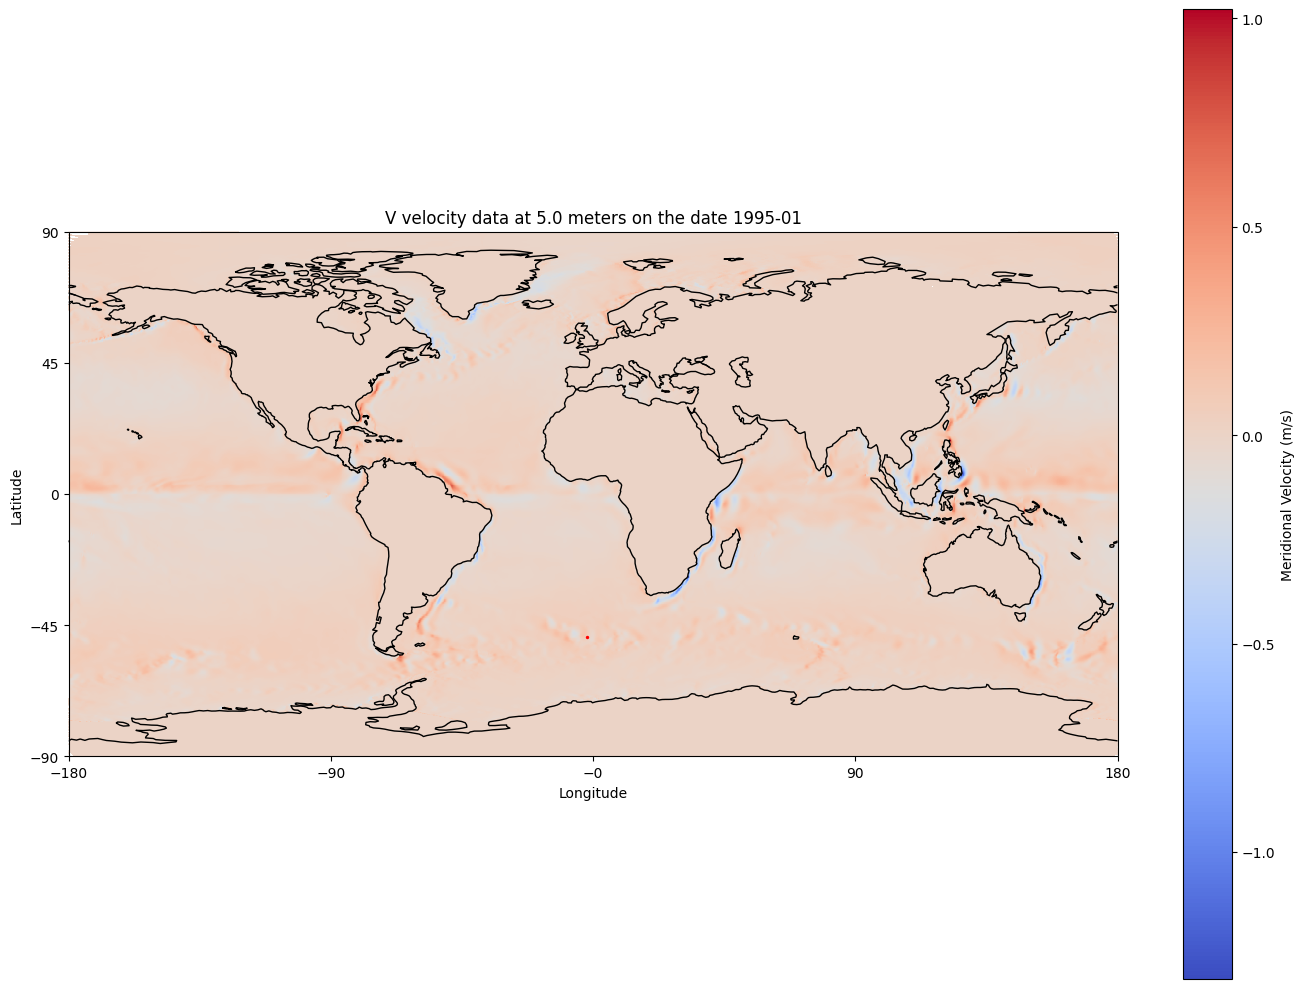

In [12]:
# Open the NetCDF file and retrieve the data
filename = f"VVEL_{dtime}.nc"
dataset = Dataset(filename, "r")

time = dataset.variables["Time"][:]
latitudes = dataset.variables["Latitude"][:]  
longitudes = dataset.variables["Longitude"][:]    
depth = dataset.variables["Depth"][:]  
V = dataset.variables["VVEL"][:]  # VVEL data (with dimensions time, depth, latitude, longitude)
title = dataset.variables["VVEL"].getncattr("long_name")
unit = dataset.variables["VVEL"].getncattr("units")

# Select a specific time and depth value
time_idx = 0  # First time step
depth_idx = 0  # First depth level

# Extract the data for the selected time and depth
V_selected = V[time_idx, depth_idx, :, :]

dataset.close()

# Define the scatter point (longitude, latitude)
scatter_point = (-2, -49)

# Plot the V data with the selected scatter point
plot_flat_data(longitudes, latitudes, V_selected, variable_name="V velocity", colorbar_title=title, 
               unit=unit, depth_value=depth[depth_idx], time_value=dtime, scatter_point=scatter_point)

In [30]:
# Define grid dimensions
nx = 270  # Number of grid points in the x-direction
ny = 13 * nx  # Number of grid points in the y-direction
nz = 50  # Number of vertical layers

# Read and flatten binary data (W)
data = MITgcmutils.utils.readbin(f"wVel.{file}.data", (nz, ny, nx), dataprec="float32", machineformat="b")
W = np.array([flat(data[depth, :, :]) for depth in range(nz)])

# Create the NetCDF file for V velocity
create_netcdf("WVEL", dtime, W, time_start, Zl, flat_XC_inter[0, :, :],
              flat_YC_inter[0, :, :], date=date_start, var_units="m/s",
              var_long_name="Vertical Velocity")

File WVEL_1995-01.nc created successfully!


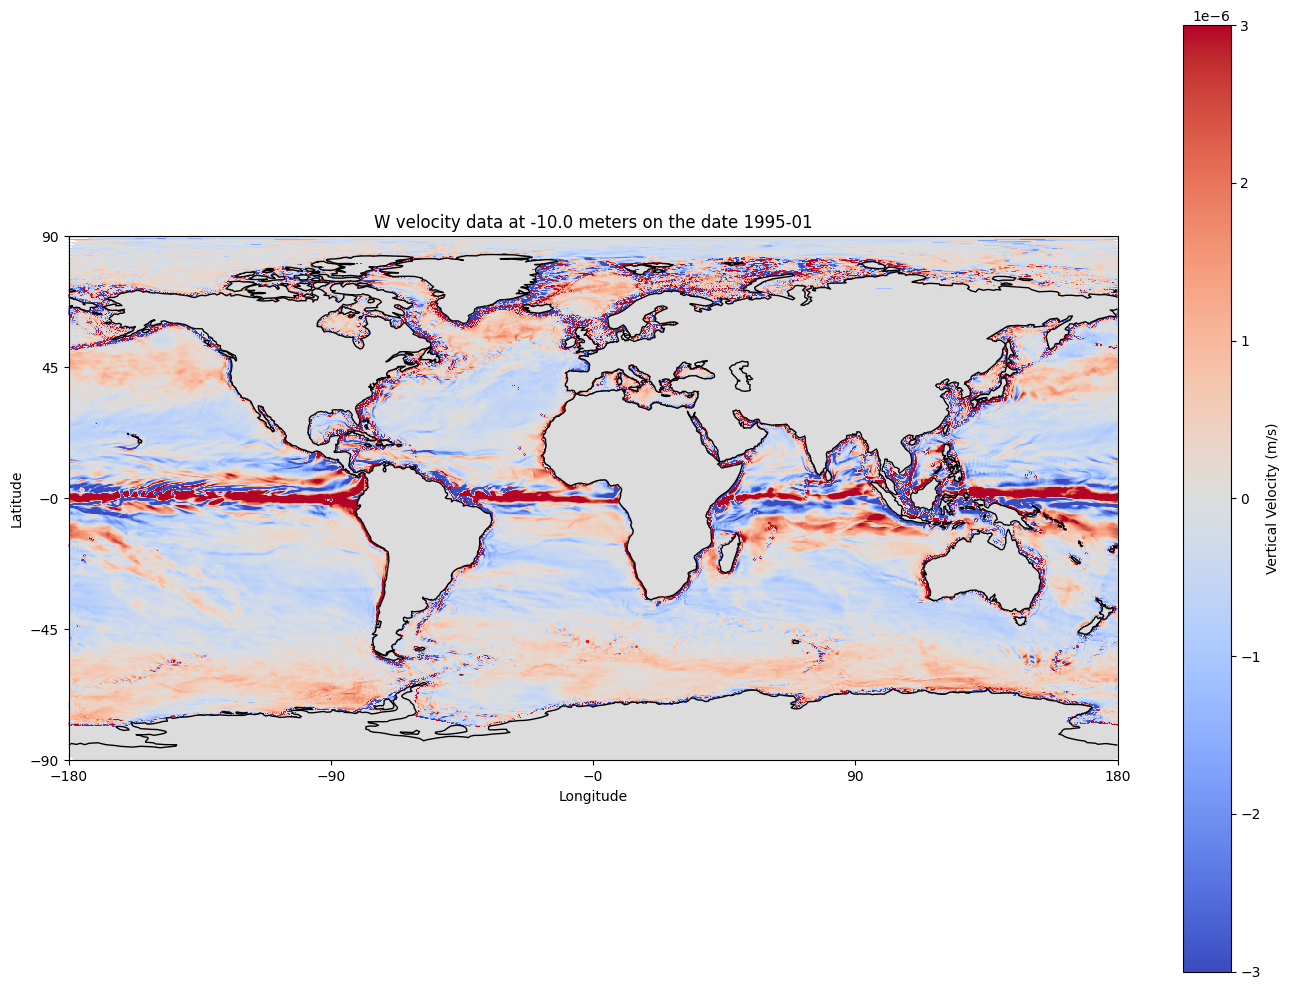

In [11]:
# Open the NetCDF file and retrieve the data
filename = f"WVEL_{dtime}.nc"
dataset = Dataset(filename, "r")

time = dataset.variables["Time"][:]
latitudes = dataset.variables["Latitude"][:]
longitudes = dataset.variables["Longitude"][:]
depth = dataset.variables["Depth"][:]
W = dataset.variables["WVEL"][:]  # WVEL data (with dimensions time, depth, latitude, longitude)
title = dataset.variables["WVEL"].getncattr("long_name")
unit = dataset.variables["WVEL"].getncattr("units")

# Select a specific time and depth value
time_idx = 0  # First time step
depth_idx = 1  # First depth level

# Extract the data for the selected time and depth
W_selected = W[time_idx, depth_idx, :, :]

dataset.close()

# Define the scatter point (longitude, latitude)
scatter_point = (-2, -49)

# Plot the V data with the selected scatter point
plot_flat_data(longitudes, latitudes, W_selected, variable_name="W velocity", colorbar_title=title,
               unit=unit, depth_value=depth[depth_idx], time_value=dtime, scatter_point=scatter_point, min_max=[-0.000003, 0.000003])

In [14]:
# Find the indices and the actual coordinates closest to the given longitude and latitude 
target_x = -2  # Target longitude
target_y = -49  # Target latitude
(y_idx, x_idx) = find_nearest_indices(longitudes, latitudes, target_x, target_y)[0]  # Find the nearest indices (Y and X)
(nearest_lon, nearest_lat) = find_nearest_indices(longitudes, latitudes, target_x, target_y)[1]  # Find the nearest coordinates (Longitude and Latitude)

print(f"Found indices: X = {x_idx}, Y = {y_idx}") 
print(f"Nearest actual coordinates: Longitude = {nearest_lon}, Latitude = {nearest_lat}")  
print(f"DIC value at these coordinates: {DIC_selected[y_idx, x_idx]}")
print(f"ALK value at these coordinates: {ALK_selected[y_idx, x_idx]}")
print(f"U velocity value at these coordinates: {U_selected[y_idx, x_idx]}")
print(f"V velocity value at these coordinates: {V_selected[y_idx, x_idx]}")

Found indices: X = 648, Y = 312
Nearest actual coordinates: Longitude = -1.8333333730697632, Latitude = -49.013607025146484
DIC value at these coordinates: 2168.911865234375
ALK value at these coordinates: 2343.025634765625
U velocity value at these coordinates: 0.16980841755867004
V velocity value at these coordinates: 0.04691421985626221


### Save NetCDF files for DIC, ALK, U, and V data at a specific depth

In [8]:
# Select the depth level (surface = 0, bottom = 49)
depth = 0

# Save the extracted data to use with Parcels
extract_data_at_depth("DIC", dtime, depth)
extract_data_at_depth("ALK", dtime, depth)
extract_data_at_depth("SALT", dtime, depth)
extract_data_at_depth("SST", dtime, depth)
extract_data_at_depth("UVEL", dtime, depth)
extract_data_at_depth("VVEL", dtime, depth)

DIC data extracted and saved for depth 0.
ALK data extracted and saved for depth 0.
SALT data extracted and saved for depth 0.
SST data extracted and saved for depth 0.
UVEL data extracted and saved for depth 0.
VVEL data extracted and saved for depth 0.
